In [1]:
import warnings
warnings.filterwarnings("ignore")

import nltk


nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')

from textblob import TextBlob
from nltk import corpus   
import datetime
stop_words = list(corpus.stopwords.words('english'))

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import numpy, pandas, matplotlib.pyplot as rsmvs, seaborn, wordcloud
import sklearn
from sklearn import metrics,model_selection,preprocessing,pipeline,preprocessing
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from plotly import express
from sklearn import tree, linear_model, ensemble, neighbors, naive_bayes
from sklearn import feature_extraction, utils, model_selection

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Reading

In [2]:
RCJob=pandas.read_csv("UpdatedResumeDataSet.csv")
ClfResume=RCJob.copy()
ClfResume.head(10)

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
5  Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...
6  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7  Data Science  Education Details \r\n B.Tech   Rayat and Bahr...
8  Data Science  Personal Skills â¢ Ability to quickly grasp t...
9  Data Science  Expertise â Data and Quantitative Analysis â...

In [3]:
ClfResume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
pandas.DataFrame(ClfResume['Category'].value_counts()[::-1]).to_csv("JC.csv")

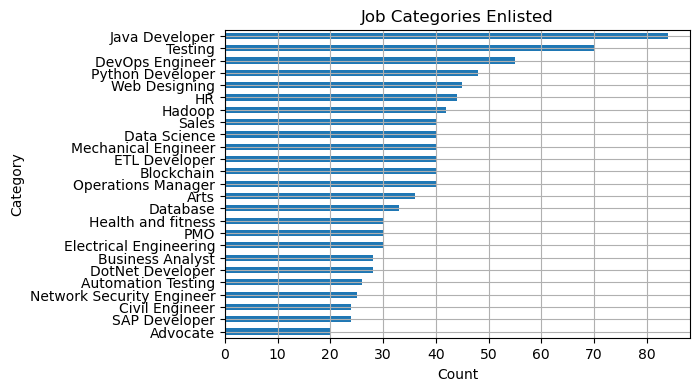

In [5]:
ClfResume['Category'].value_counts()[::-1].plot(kind='barh', title="Job Categories Enlisted", figsize=(6,4))
rsmvs.xlabel("Count")
rsmvs.grid()
rsmvs.show()

## Text Cleaning

In [6]:
def LmtzResumeTokens(rusmlm):
    return  [lemmatizer.lemmatize(lm) for lm in rusmlm]
def CleanResume(rusmdt):
    rusm_stp = list(stopwords.words('english'))
    rusm_pcl=""
    rusm_tg=["rt","RT","http","HTTP","https","HTTPS","com","COM"]
    for tt in rusmdt:
        if tt.isalpha()==True:
            rusm_pcl+=tt
        if tt.isalnum()==False:
            pass
        if tt==" ":
            rusm_pcl+=" "
    rusm_pcl=rusm_pcl.lower()
    rusm_tk=rusm_pcl.split()
    rusm_tk1=[]
    for t1 in rusm_tk:
        if t1 not in rusm_tg:
            rusm_tk1.append(t1)
    rusm_tk2=[]
    for t2 in rusm_tk1:
        if t2 not in rusm_stp:
            rusm_tk2.append(t2)
    rusm_tk2=LmtzResumeTokens(rusm_tk2)
    return ' '.join(rusm_tk2)
RsmFetCl=[]
rstxts=ClfResume["Resume"].tolist()
for x in rstxts:
    RsmFetCl.append(CleanResume(x))
ClfResume['Resume']=RsmFetCl
ClfResume.head(10)

Category                                             Resume
0  Data Science  skill programming language python panda numpy ...
1  Data Science  education detail may may uitrgpvdata scientist...
2  Data Science  area interest deep learning control system des...
3  Data Science  skill â r â python â sap hana â tableau â sap ...
4  Data Science  education detail mca ymcaust faridabad haryana...
5  Data Science  skill c basic iot python matlab data science m...
6  Data Science  skill â python â tableau â data visualization ...
7  Data Science  education detail btech rayat bahra institute e...
8  Data Science  personal skill â ability quickly grasp technic...
9  Data Science  expertise â data quantitative analysis â decis...

## Resume Sentiment and Data Preparation (For Job Recommendation System)

In [7]:
Rusm_FetCl=ClfResume['Resume'].tolist()
rusm_sbval=[]
rusm_recom_type=[]
for i in Rusm_FetCl:
    tbresume=TextBlob(str(i)).sentiment
    rusm_sbval.append(tbresume[1])
for i in range(len(rusm_sbval)):
    if rusm_sbval[i]<0.5 and rusm_sbval[i]>0.1:
        rusm_recom_type.append("Highly Recommended")
    elif rusm_sbval[i]<0.3 and rusm_sbval[i]==0.1:
        rusm_recom_type.append("Recommended")
    elif rusm_sbval[i]<0.1 and rusm_sbval[i]>=-0.1:
        rusm_recom_type.append("Partially Recommended")
    elif rusm_sbval[i]>0:
        rusm_recom_type.append("Not Recommended")
ClfResume['Subjectivity']=rusm_sbval
ClfResume['Recommendation']=rusm_recom_type
ClfResume=ClfResume.reset_index(drop=True)
ClfResume.head(20)

Category                                             Resume  \
0   Data Science  skill programming language python panda numpy ...   
1   Data Science  education detail may may uitrgpvdata scientist...   
2   Data Science  area interest deep learning control system des...   
3   Data Science  skill â r â python â sap hana â tableau â sap ...   
4   Data Science  education detail mca ymcaust faridabad haryana...   
5   Data Science  skill c basic iot python matlab data science m...   
6   Data Science  skill â python â tableau â data visualization ...   
7   Data Science  education detail btech rayat bahra institute e...   
8   Data Science  personal skill â ability quickly grasp technic...   
9   Data Science  expertise â data quantitative analysis â decis...   
10  Data Science  skill programming language python panda numpy ...   
11  Data Science  education detail may may uitrgpvdata scientist...   
12  Data Science  area interest deep learning control system des...   
13  Data Science  skill â r â python â sap hana â tableau â sap ...   
14  Data Science  education detail mca ymcaust faridabad haryana...   
15  Data Science  skill c basic iot python matlab data science m...   
16  Data Science  skill â python â tableau â data visualization ...   
17  Data Science  education detail btech rayat bahra institute e...   
18  Data Science  personal skill â ability quickly grasp technic...   
19  Data Science  expertise â data quantitative analysis â decis...   

    Subjectivity         Recommendation  
0       0.364024     Highly Recommended  
1       0.163636     Highly Recommended  
2       0.170677     Highly Recommended  
3       0.333971     Highly Recommended  
4       0.066667  Partially Recommended  
5       0.121296     Highly Recommended  
6       0.463170     Highly Recommended  
7       0.424062     Highly Recommended  
8       0.470000     Highly Recommended  
9       0.346942     Highly Recommended  
10      0.364024     Highly Recommended  
11      0.163636     Highly Recommended  
12      0.170677     Highly Recommended  
13      0.333971     Highly Recommended  
14      0.066667  Partially Recommended  
15      0.121296     Highly Recommended  
16      0.463170     Highly Recommended  
17      0.424062     Highly Recommended  
18      0.470000     Highly Recommended  
19      0.346942     Highly Recommended

Recommendation
Highly Recommended       732
Not Recommended          129
Partially Recommended     93
Recommended                8
Name: count, dtype: int64


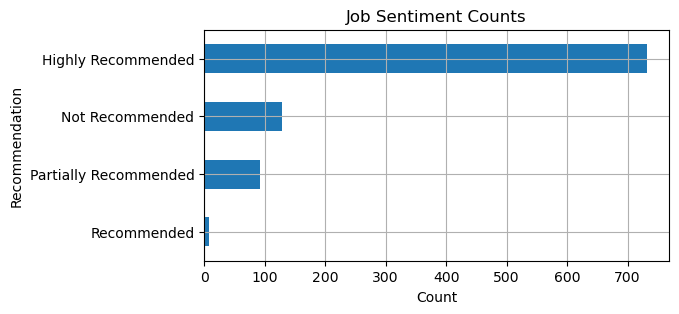

In [8]:
print(ClfResume['Recommendation'].value_counts())
ClfResume['Recommendation'].value_counts()[::-1].plot(kind='barh', title="Job Sentiment Counts", figsize=(6,3))
rsmvs.xlabel("Count")
rsmvs.grid()
rsmvs.show()

In [9]:
rslist=ClfResume['Resume'].tolist()
lenresume=[]
for l in range(len(rslist)):
    lenresume.append(len(rslist[l].split()))
ClfResume['Resume_Length']=lenresume
ClfResume.head(10)

Category                                             Resume  \
0  Data Science  skill programming language python panda numpy ...   
1  Data Science  education detail may may uitrgpvdata scientist...   
2  Data Science  area interest deep learning control system des...   
3  Data Science  skill â r â python â sap hana â tableau â sap ...   
4  Data Science  education detail mca ymcaust faridabad haryana...   
5  Data Science  skill c basic iot python matlab data science m...   
6  Data Science  skill â python â tableau â data visualization ...   
7  Data Science  education detail btech rayat bahra institute e...   
8  Data Science  personal skill â ability quickly grasp technic...   
9  Data Science  expertise â data quantitative analysis â decis...   

   Subjectivity         Recommendation  Resume_Length  
0      0.364024     Highly Recommended            471  
1      0.163636     Highly Recommended             98  
2      0.170677     Highly Recommended            167  
3      0.333971     Highly Recommended            662  
4      0.066667  Partially Recommended             42  
5      0.121296     Highly Recommended             72  
6      0.463170     Highly Recommended            169  
7      0.424062     Highly Recommended            712  
8      0.470000     Highly Recommended            176  
9      0.346942     Highly Recommended            434

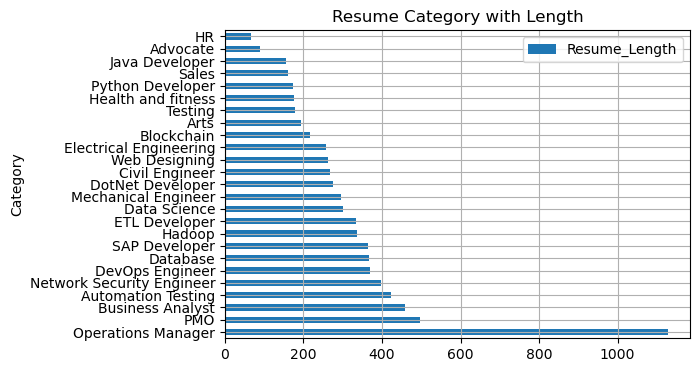

In [10]:
ClfResume.groupby('Category').agg({'Resume_Length':numpy.mean}).sort_values(by=('Resume_Length')
                    ,ascending=False).plot(kind='barh', title="Resume Category with Length", figsize=(6,4))
rsmvs.grid()
rsmvs.show()

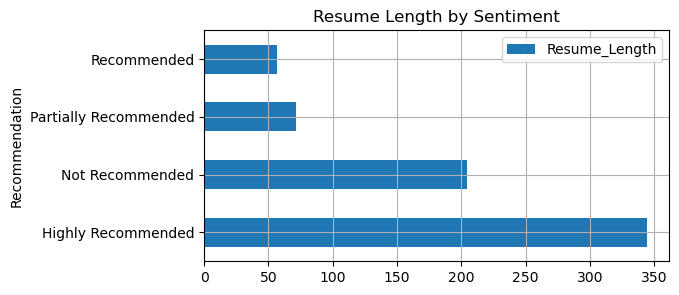

In [11]:
ClfResume.groupby('Recommendation').agg({'Resume_Length':numpy.mean}).sort_values(by=('Resume_Length')
                    ,ascending=False).plot(kind='barh', title="Resume Length by Sentiment", figsize=(6,3))
rsmvs.grid()
rsmvs.show()

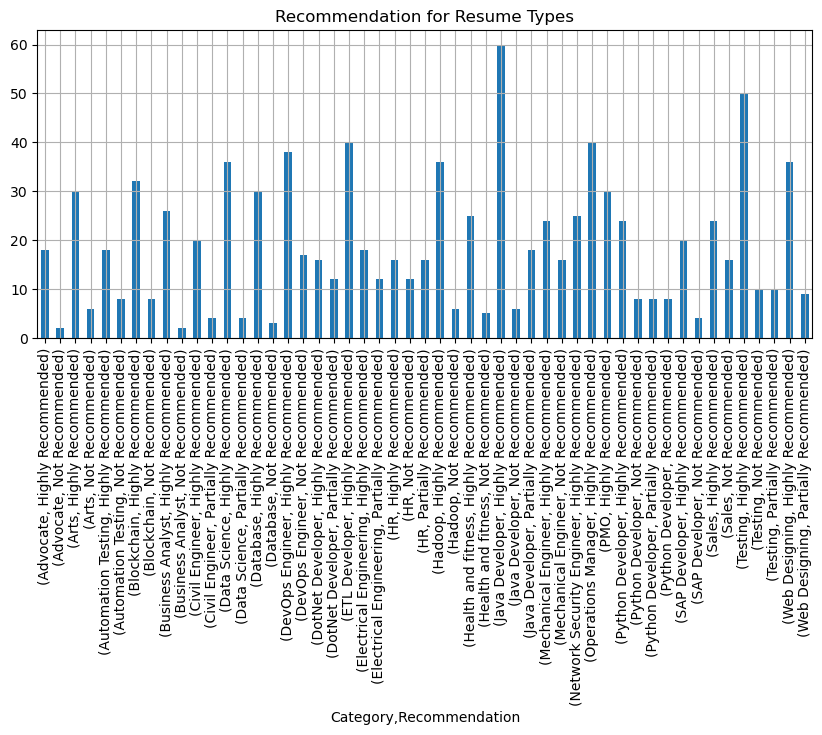

In [12]:
ClfResume.groupby(['Category','Recommendation']).size().plot(kind='bar', figsize=(10,4), title='Recommendation for Resume Types')
rsmvs.grid()
rsmvs.show()

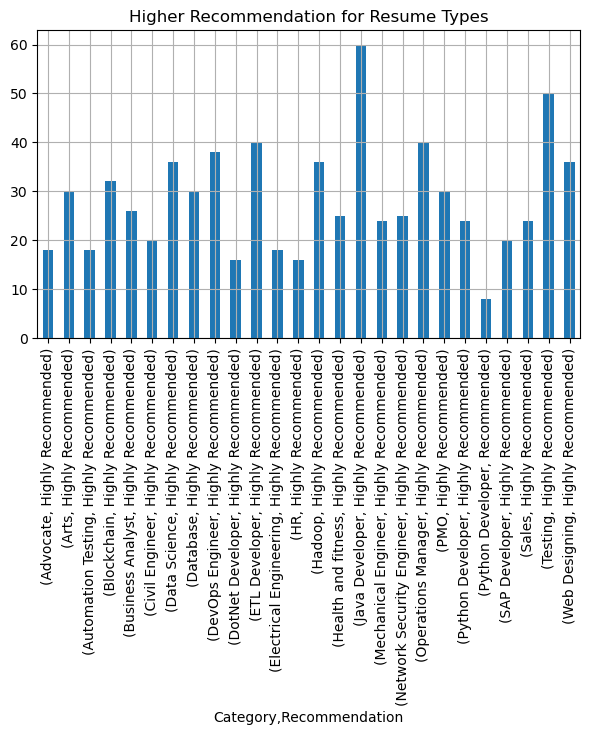

In [13]:
RcmJD=ClfResume[(ClfResume['Recommendation']=='Recommended')|(ClfResume['Recommendation']=='Highly Recommended')]
RcmJD.groupby(['Category','Recommendation']).size().plot(kind='bar', figsize=(7,4), title='Higher Recommendation for Resume Types')
rsmvs.grid()
rsmvs.show()

In [14]:
print(ClfResume.Category.value_counts())
rsmct=ClfResume.Category.value_counts().index.tolist()
rsmvl=ClfResume.Category.value_counts().tolist()
mxval=max(rsmvl)
blncd_rusm=[]
for ac in rsmct:
    bldf=ClfResume[ClfResume['Category']==ac]
    bldf=utils.resample(bldf, replace = True, n_samples = mxval, random_state = 0)
    blncd_rusm.append(bldf)
ClfResumeBlnc=pandas.concat(blncd_rusm).sample(frac=1).reset_index(drop=True)
print(ClfResumeBlnc.Category.value_counts())
print(len(ClfResumeBlnc.Category.value_counts()))

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64
Category
Health and fitness           84
Advocate                     84
DevOps Engineer              84
Java Developer               84
HR                          

## Data Preparation

In [15]:
X=ClfResume['Resume']
y=ClfResume['Category']
TrResumX,TsResumX,TrResumY,TsResumY=model_selection.train_test_split(X,y,train_size=0.75,random_state=32)
TrResumX=TrResumX.reset_index(drop=True)
TsResumX=TsResumX.reset_index(drop=True)
TrResumY=TrResumY.reset_index(drop=True)
TsResumY=TsResumY.reset_index(drop=True)


print(TrResumY.value_counts())
print(TsResumY.value_counts())

Category
Java Developer               68
Testing                      53
DevOps Engineer              40
Python Developer             39
Web Designing                37
Hadoop                       34
HR                           32
Arts                         31
Blockchain                   31
Data Science                 30
Mechanical Engineer          29
Operations Manager           27
ETL Developer                26
Sales                        26
Database                     25
Automation Testing           22
Electrical Engineering       22
PMO                          22
DotNet Developer             22
Business Analyst             21
Health and fitness           20
Network Security Engineer    20
Civil Engineer               19
SAP Developer                15
Advocate                     10
Name: count, dtype: int64
Category
Testing                      17
Java Developer               16
DevOps Engineer              15
ETL Developer                14
Sales                       

## Model Preparation

In [16]:
ModelsResum=[
    ensemble.RandomForestClassifier(),
    naive_bayes.MultinomialNB(),
    linear_model.LogisticRegression(),
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier()
]
ModelIDResum=[
    "Random Forest",
    "Naive Bayes",
    "Logistic Regression",
    "K-Neighbors",
    "Decision Tree"
]

In [17]:
ModelsResum[0]

RandomForestClassifier()

In [18]:
ModelsResum[1]

MultinomialNB()

In [19]:
ModelsResum[2]

LogisticRegression()

In [20]:
ModelsResum[3]

KNeighborsClassifier()

In [21]:
ModelsResum[4]

DecisionTreeClassifier()

## Function to Show Confusion Matrix

In [22]:
def CnfVsFn(mtrx,nmcl,rn):
    rsmvs.figure(figsize=(10,7))
    rsmvs.title("Confusion Matrix for \n{}({})".format(nmcl,rn),fontsize=18,color="m")
    seaborn.heatmap(mtrx.iloc[:25,:25],annot=True,cmap="plasma",fmt="d")
    rsmvs.savefig("{}".format(nmcl))
    rsmvs.show()

## Feature Extraction

In [23]:
FetExtUG=CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(1,1))
FetExtUGVcTr=FetExtUG.fit_transform(TrResumX) 
print(FetExtUGVcTr.shape[1])

FetExtBG=CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(2,2))
FetExtBGVcTr=FetExtBG.fit_transform(TrResumX) 
print(FetExtBGVcTr.shape[1])

9025
31721


### Feature Extraction With Unigram and Classification

________________________________________________________________________
                         Random Forest
________________________________________________________________________


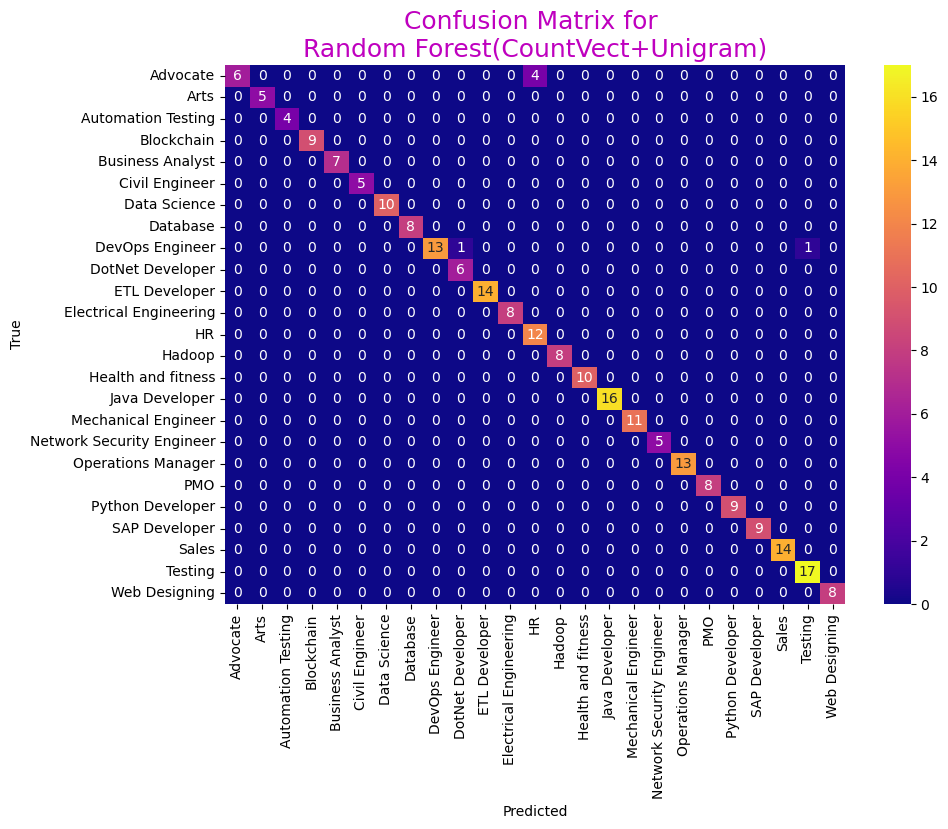

                           precision    recall  f1-score   support

                 Advocate       1.00      0.60      0.75        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       0.86      1.00      0.92         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.75      1.00      0.86        12
                   Hadoop       1.00      1.00      1.00     

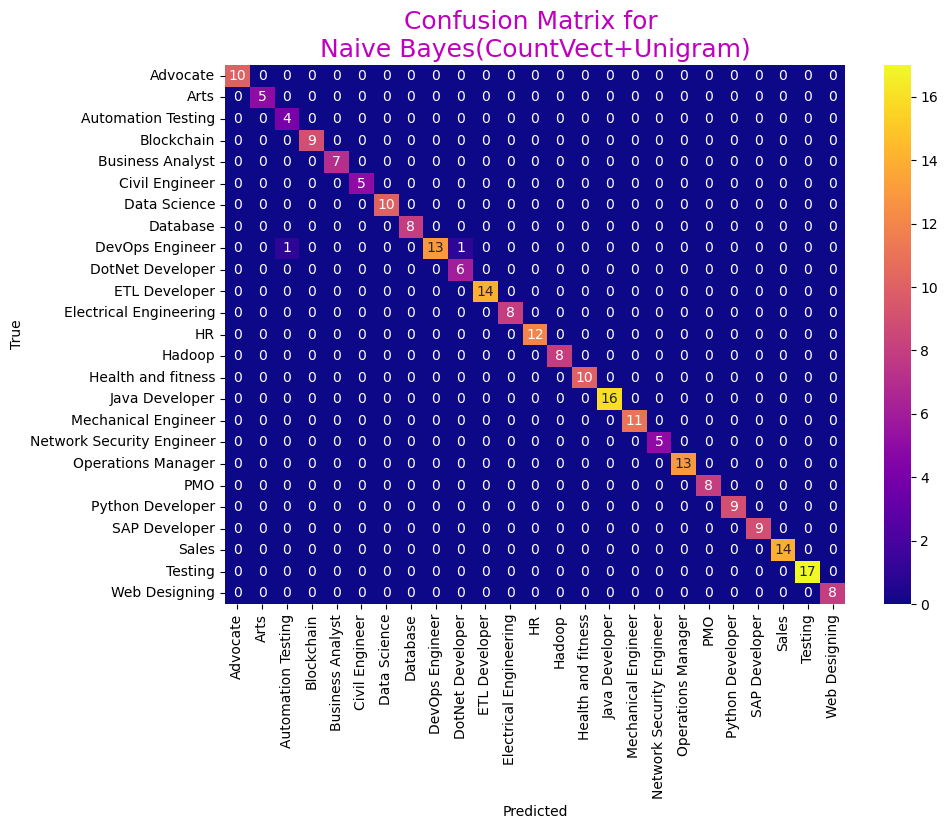

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       0.80      1.00      0.89         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       0.86      1.00      0.92         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

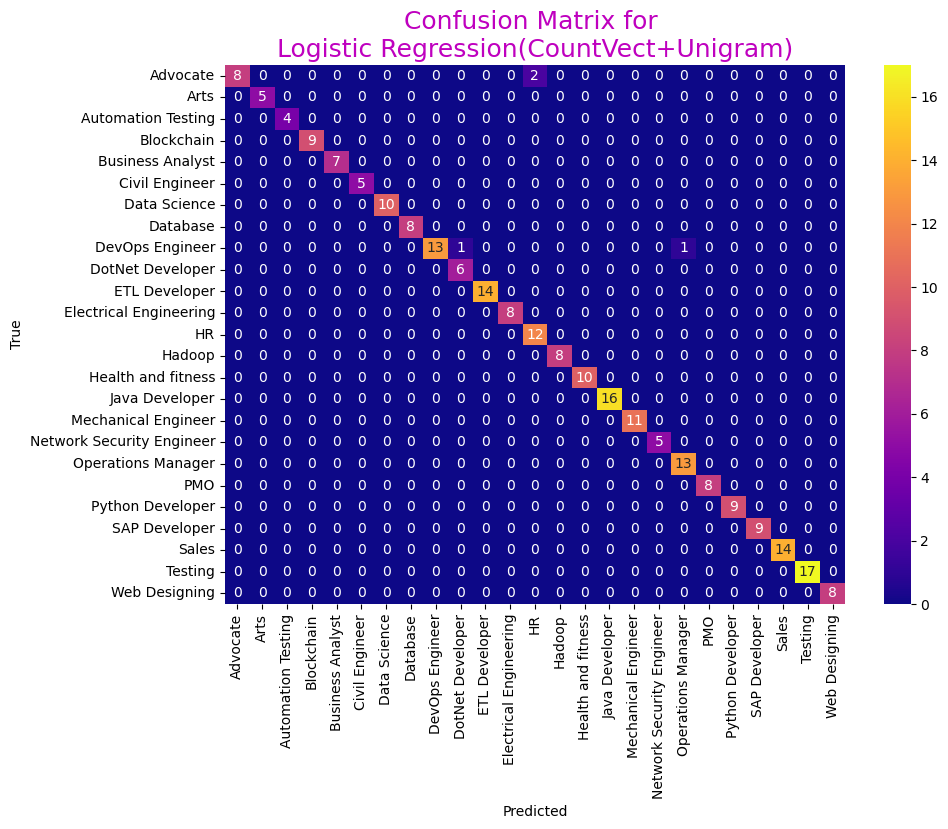

                           precision    recall  f1-score   support

                 Advocate       1.00      0.80      0.89        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       0.86      1.00      0.92         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.86      1.00      0.92        12
                   Hadoop       1.00      1.00      1.00     

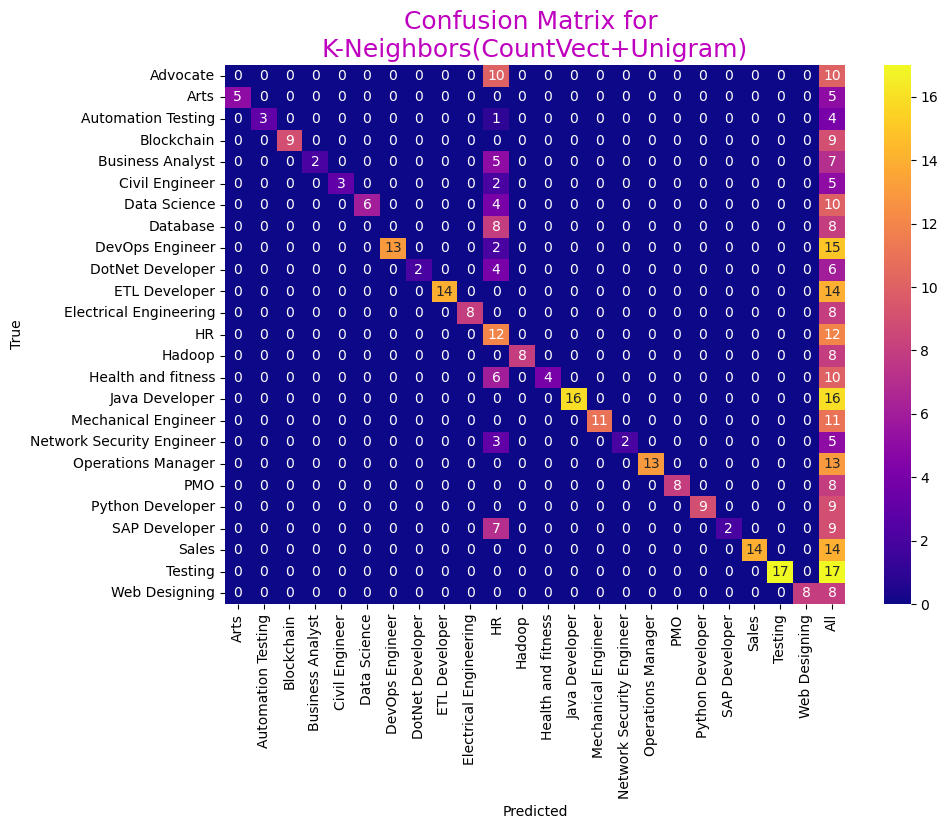

                           precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      0.75      0.86         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      0.29      0.44         7
           Civil Engineer       1.00      0.60      0.75         5
             Data Science       1.00      0.60      0.75        10
                 Database       0.00      0.00      0.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      0.33      0.50         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.19      1.00      0.32        12
                   Hadoop       1.00      1.00      1.00     

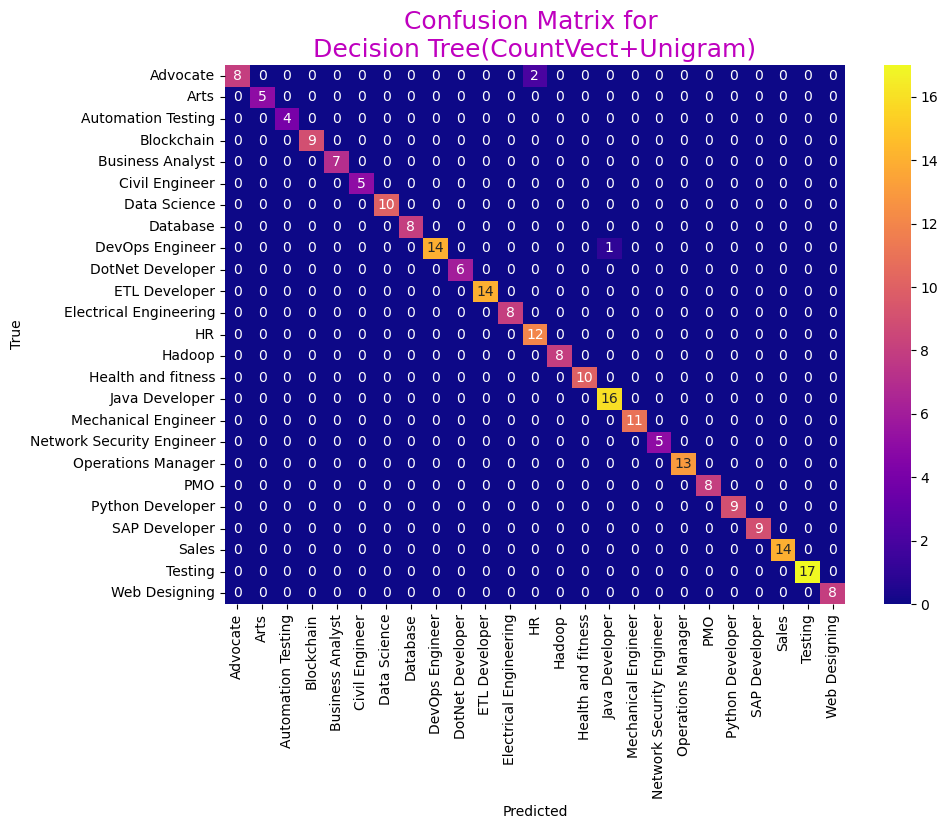

                           precision    recall  f1-score   support

                 Advocate       1.00      0.80      0.89        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.97        15
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.86      1.00      0.92        12
                   Hadoop       1.00      1.00      1.00     

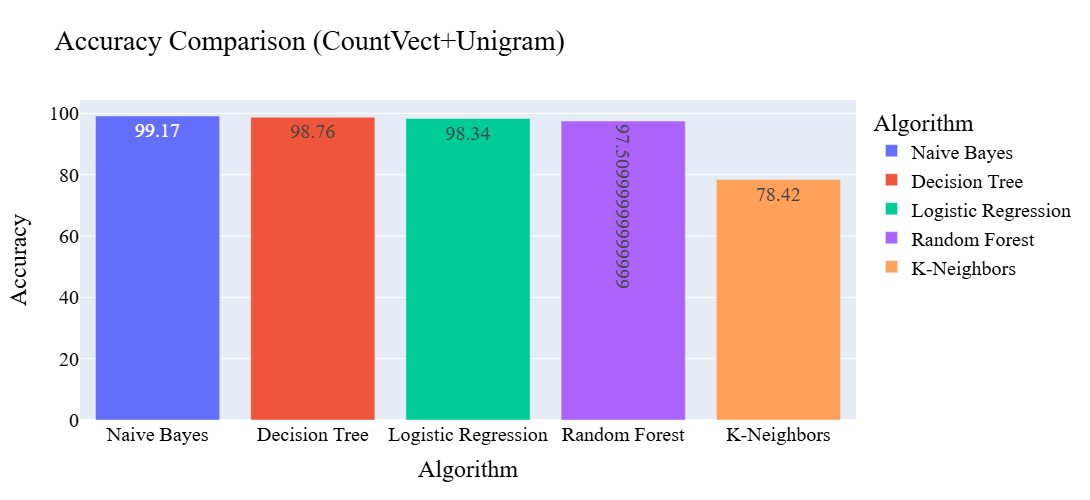

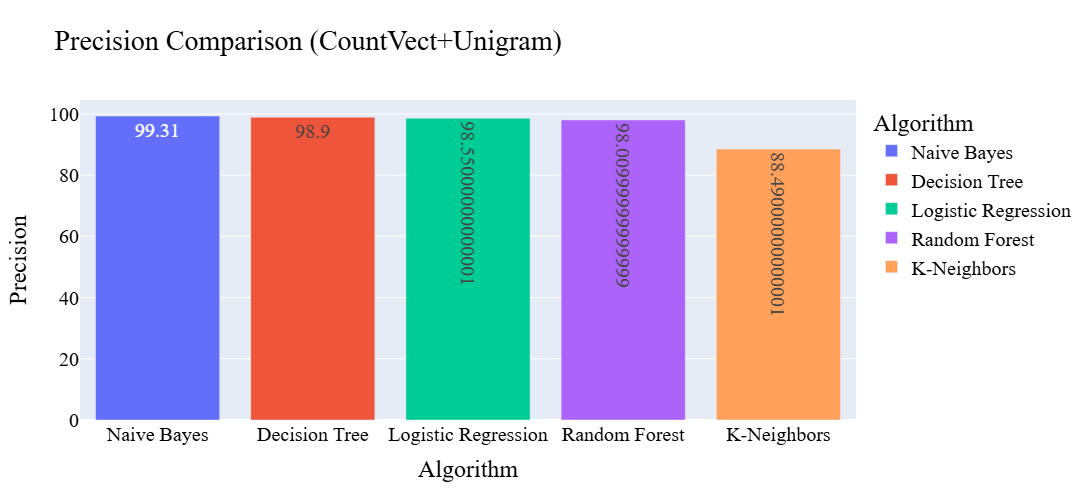

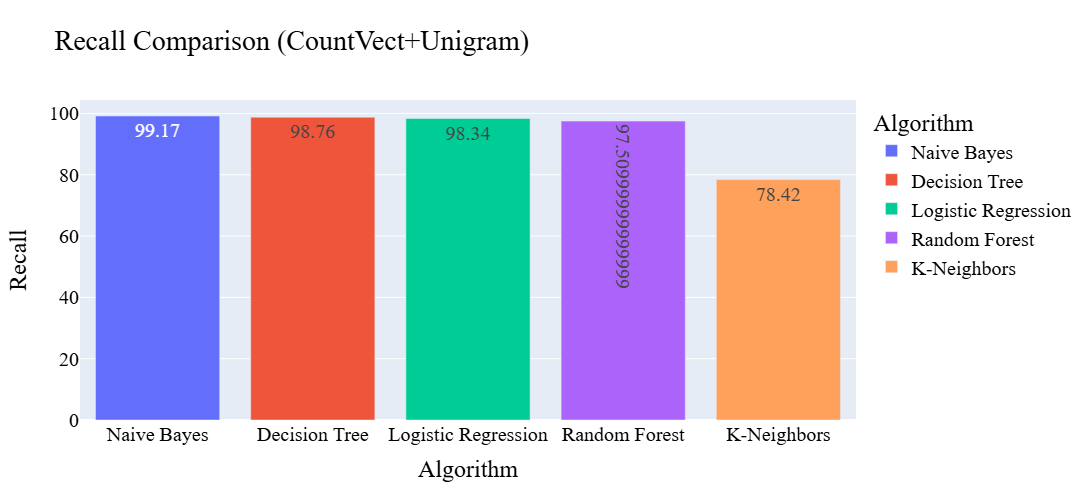

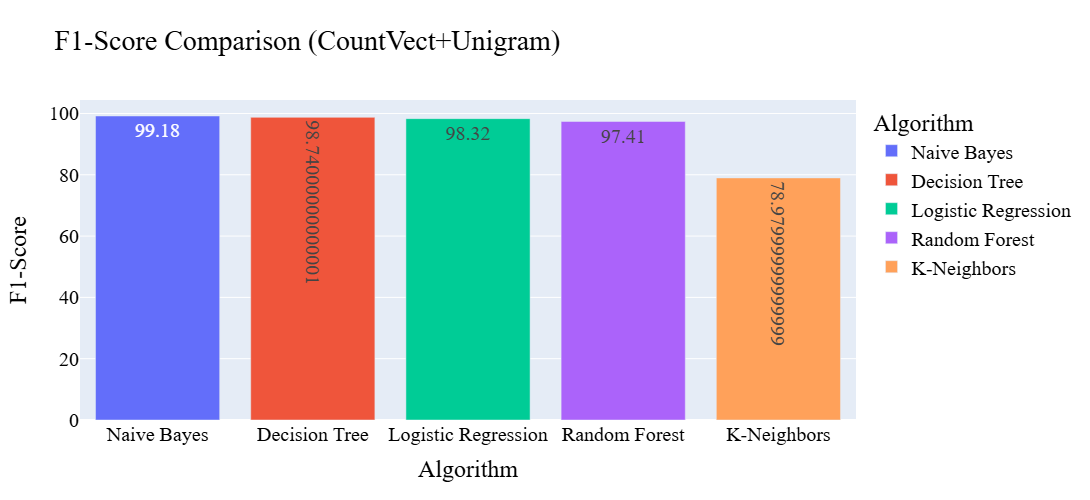

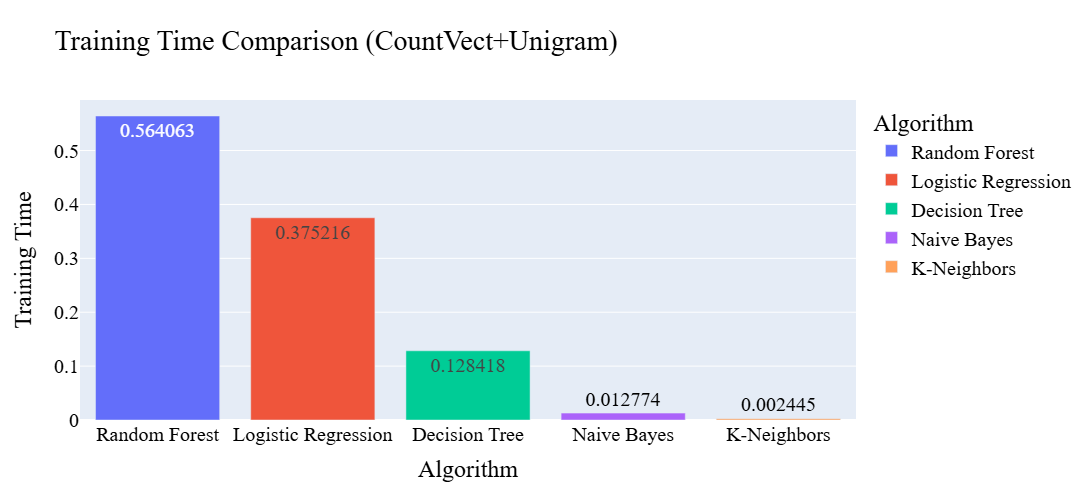

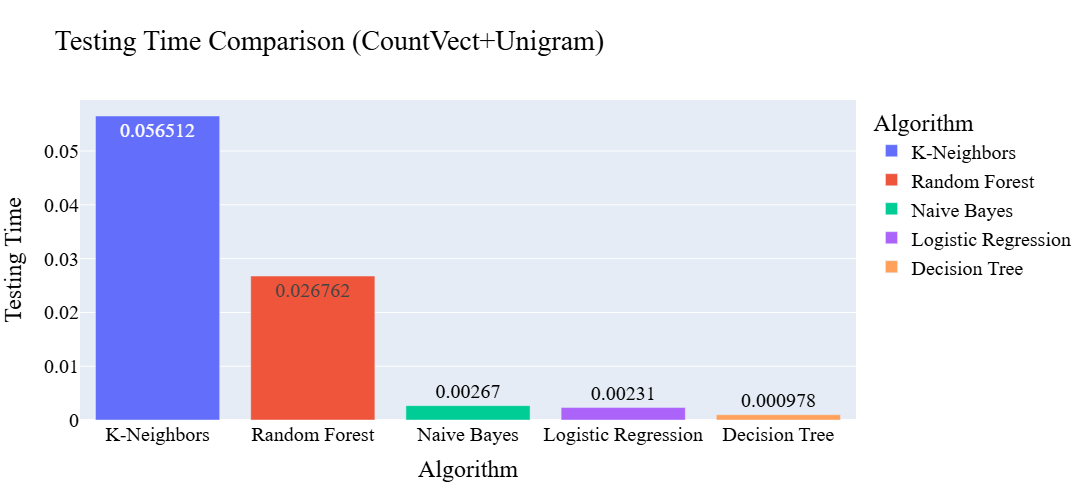

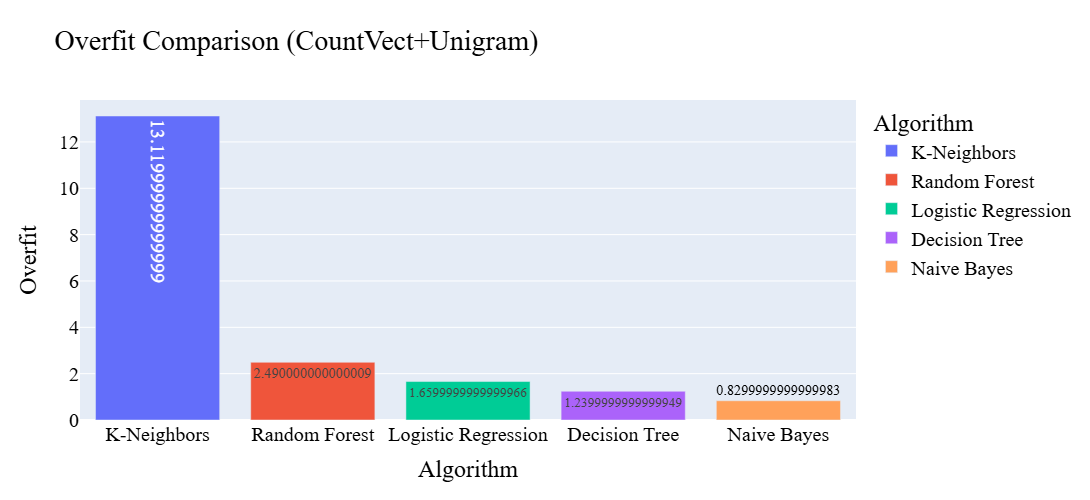

In [24]:
MetResumUG=[[],[],[],[],[],[],[]]
FetExtUG=CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(1,1))
FetExtUGVcTr=FetExtUG.fit_transform(TrResumX) 
FetExtUGVcTs=FetExtUG.transform(TsResumX)

sclob=preprocessing.StandardScaler(with_mean=False)
obj = sclob.fit(FetExtUGVcTr)
FetExtUGVcTr = obj.transform(FetExtUGVcTr)
FetExtUGVcTs = obj.transform(FetExtUGVcTs)

DcV=4
print("________________________________________________________________________")
for i in range(len(ModelsResum)):
    print("                         {}".format(ModelIDResum[i]))
    print("________________________________________________________________________")
    UGMdl = ModelsResum[i]
    init_time_execution = datetime.datetime.now() 
    UGMdl.fit(FetExtUGVcTr, TrResumY)
    end_time_execution = datetime.datetime.now()
    time_of_execution = end_time_execution - init_time_execution
    time_of_execution_sec=time_of_execution.total_seconds()
    
    Init_PredTime = datetime.datetime.now() 
    PredFetExtUG=UGMdl.predict(FetExtUGVcTs)
    End_PredTime = datetime.datetime.now()
    PredTimeTotal = End_PredTime - Init_PredTime
    PredTimeTotal_sec=PredTimeTotal.total_seconds()
    PredFetExtUGTr=UGMdl.predict(FetExtUGVcTr)
    AccFetExtUGTr=round(metrics.accuracy_score(TrResumY,PredFetExtUGTr),DcV)*100
    AccFetExtUGTs=round(metrics.accuracy_score(TsResumY,PredFetExtUG),DcV)*100
    MetResumUG[0].append(AccFetExtUGTs)
    MetResumUG[1].append(round(metrics.precision_score(TsResumY,PredFetExtUG,average="weighted"),DcV)*100)      
    MetResumUG[2].append(round(metrics.recall_score(TsResumY,PredFetExtUG,average="weighted"),DcV)*100)
    MetResumUG[3].append(round(metrics.f1_score(TsResumY,PredFetExtUG,average="weighted"),DcV)*100)
    ct=pandas.crosstab(TsResumY, PredFetExtUG, rownames=['True'], colnames=['Predicted'], margins=True)    
    MetResumUG[4].append(time_of_execution_sec)
    MetResumUG[5].append(PredTimeTotal_sec)
    MetResumUG[6].append(AccFetExtUGTr)
    CnfVsFn(ct,ModelIDResum[i],"CountVect+Unigram")
    prun=round(metrics.precision_score(TsResumY,PredFetExtUG,average="weighted"),DcV)*100
    rcun=round(metrics.recall_score(TsResumY,PredFetExtUG,average="weighted"),DcV)*100
    f1un=round(metrics.f1_score(TsResumY,PredFetExtUG,average="weighted"),DcV)*100
    
    print(metrics.classification_report(TsResumY, PredFetExtUG))
    print("\t\tAccuracy => {}%      Precision => {}%\n".format(AccFetExtUGTs,prun))
    print("\t\tRecall => {}%      F1-Score => {}%\n".format(rcun,f1un))
    print("________________________________________________________________________")

DfFetExtUG=pandas.DataFrame({
    "Algorithm":ModelIDResum,
    "Accuracy":MetResumUG[0],
    "Precision":MetResumUG[1],
    "Recall":MetResumUG[2],
    "F1-Score":MetResumUG[3],
    "Training Time":MetResumUG[4],
    "Testing Time":MetResumUG[5],
    "Overfit":numpy.array(MetResumUG[6])-numpy.array(MetResumUG[0])
})
for i in DfFetExtUG.columns[1:]:
    DfFetExtUG=DfFetExtUG.sort_values(by=i,ascending=False)
    fig = express.bar(DfFetExtUG, y=i, x="Algorithm",text=i,color="Algorithm",
                 title="{} Comparison (CountVect+Unigram)".format(i),height=500,width=700)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="Black"
        )
    )
    fig.show()

DfFetExtUG.sort_values(by="Accuracy",ascending=False).to_csv("Unigram_Result.csv")
DfFetExtUG=DfFetExtUG.sort_values(by="Accuracy",ascending=False).reset_index(drop=True)

### Feature Extrcation With Bigram and Classification

________________________________________________________________________
                         Random Forest
________________________________________________________________________


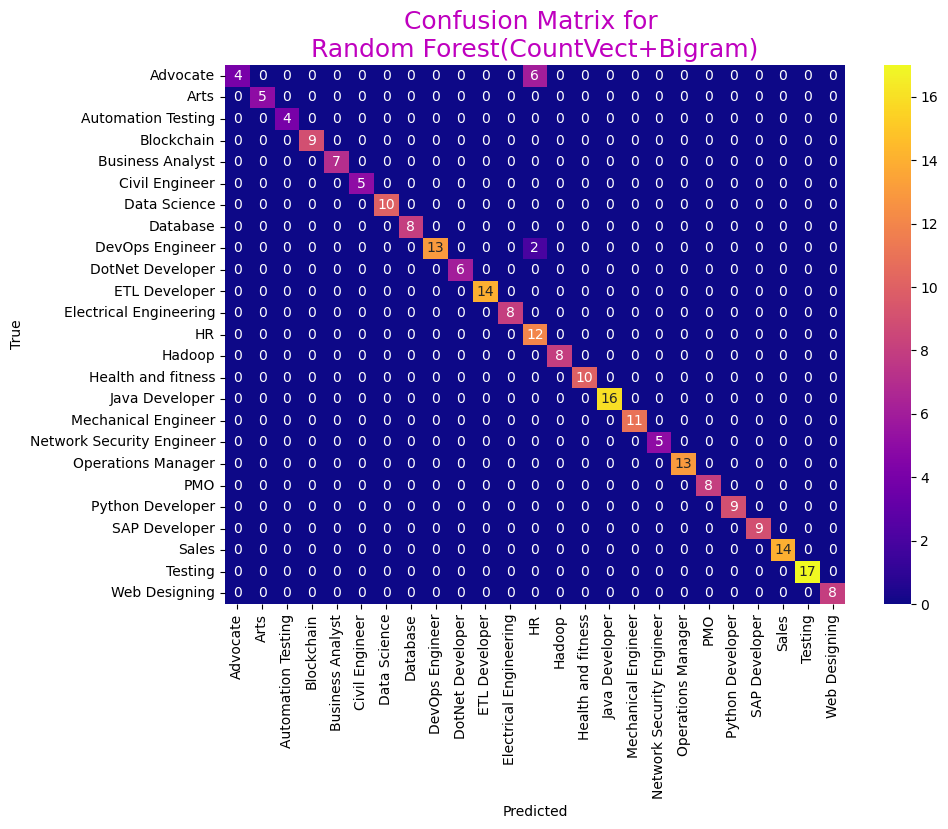

                           precision    recall  f1-score   support

                 Advocate       1.00      0.40      0.57        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.60      1.00      0.75        12
                   Hadoop       1.00      1.00      1.00     

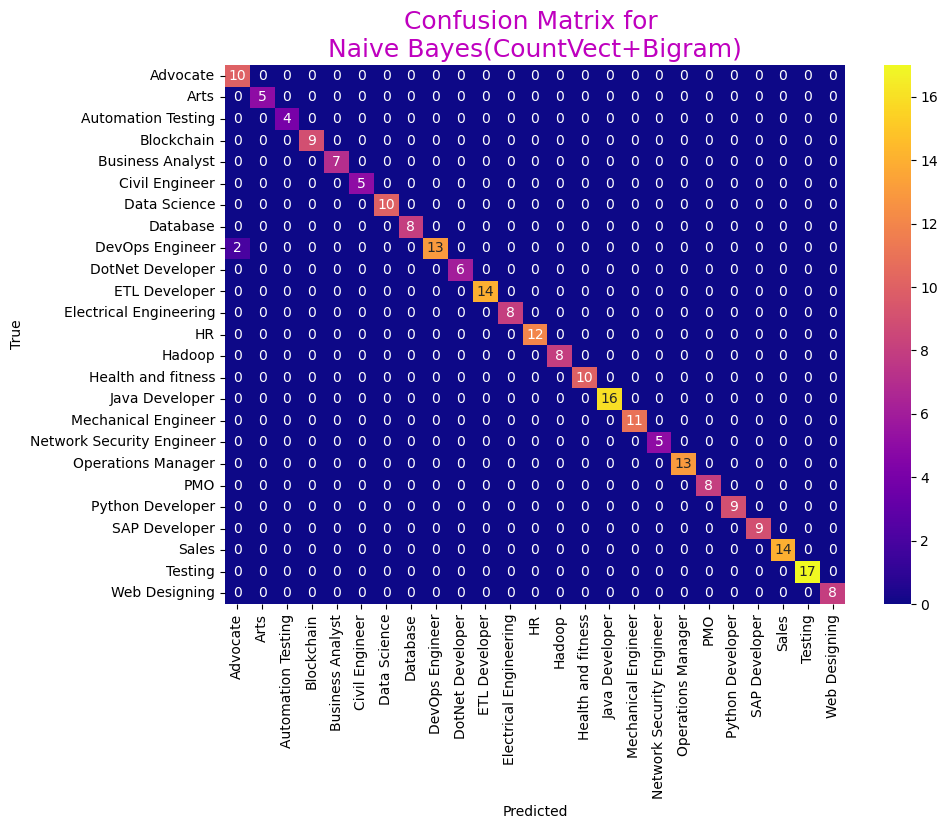

                           precision    recall  f1-score   support

                 Advocate       0.83      1.00      0.91        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

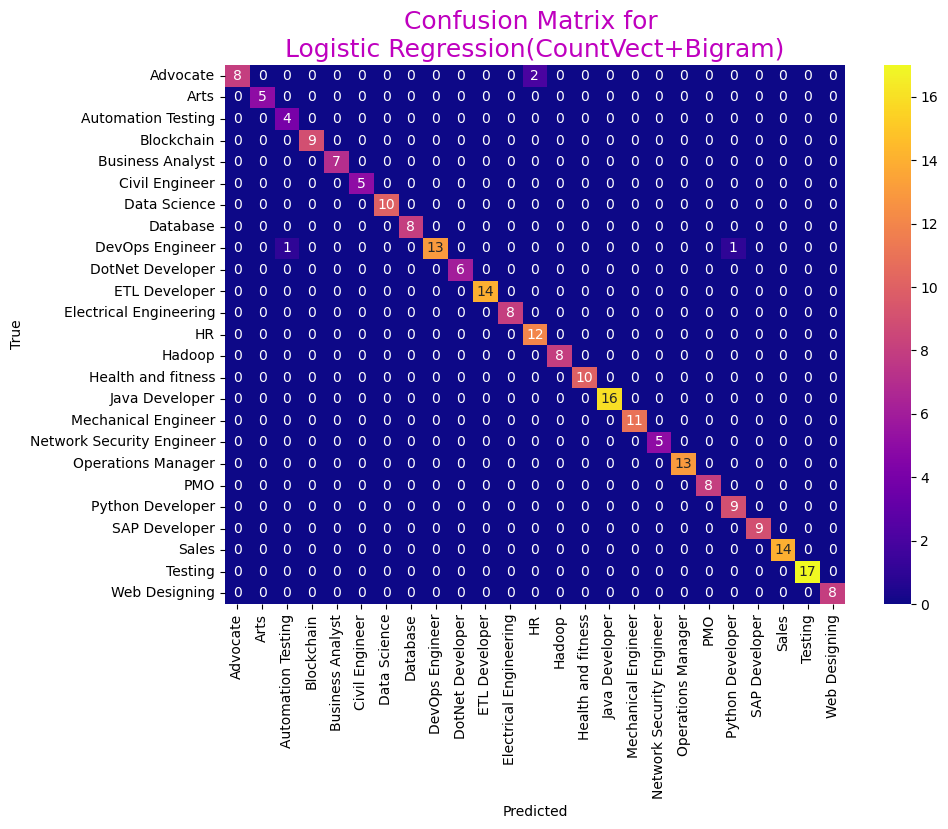

                           precision    recall  f1-score   support

                 Advocate       1.00      0.80      0.89        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       0.80      1.00      0.89         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.86      1.00      0.92        12
                   Hadoop       1.00      1.00      1.00     

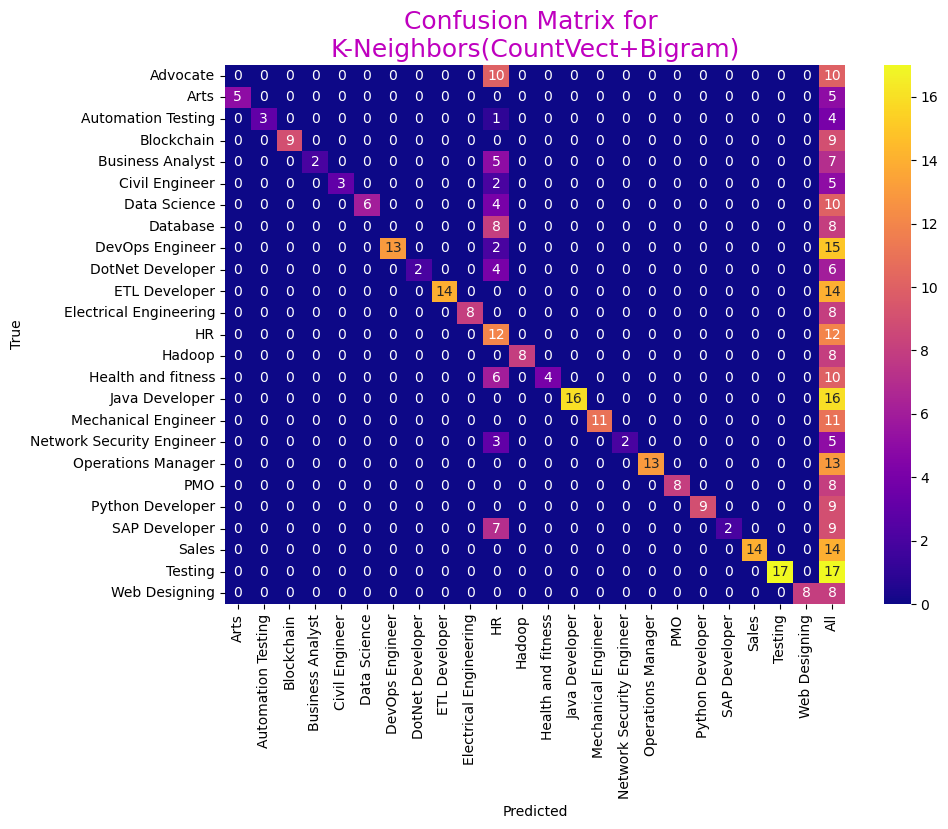

                           precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      0.75      0.86         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      0.29      0.44         7
           Civil Engineer       1.00      0.60      0.75         5
             Data Science       1.00      0.60      0.75        10
                 Database       0.00      0.00      0.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      0.33      0.50         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.19      1.00      0.32        12
                   Hadoop       1.00      1.00      1.00     

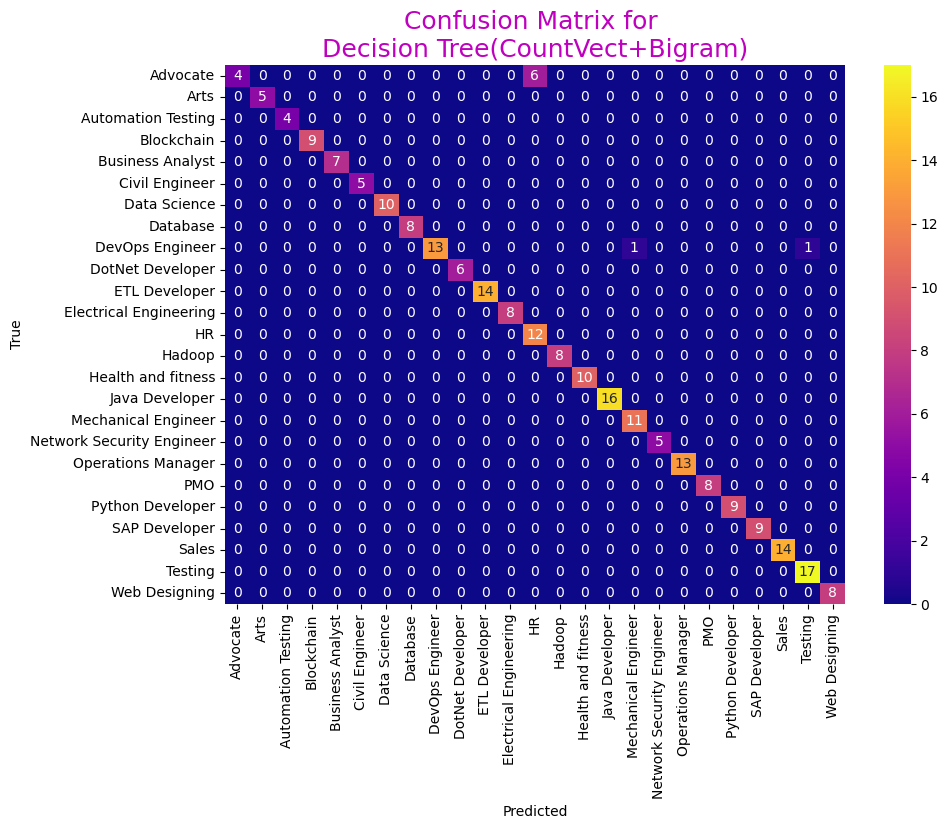

                           precision    recall  f1-score   support

                 Advocate       1.00      0.40      0.57        10
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00        14
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       0.67      1.00      0.80        12
                   Hadoop       1.00      1.00      1.00     

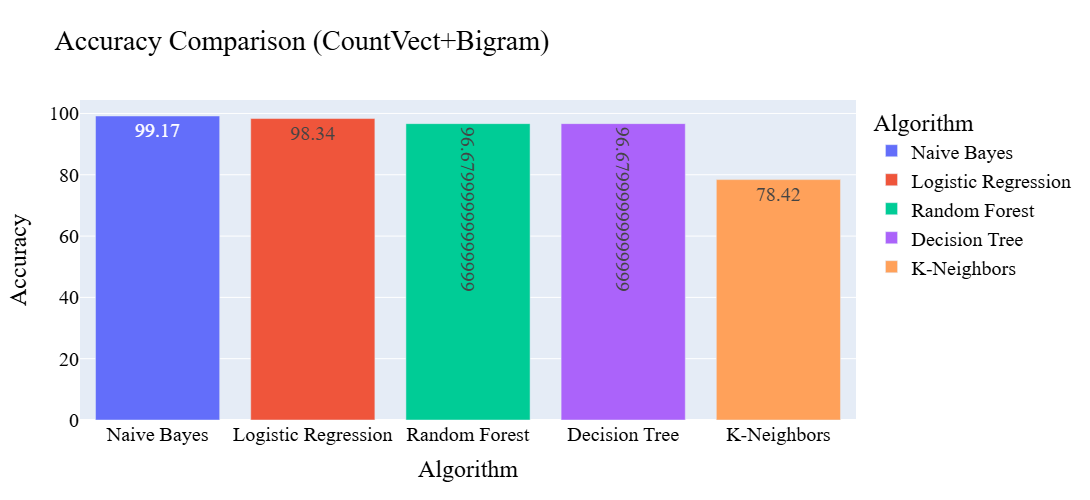

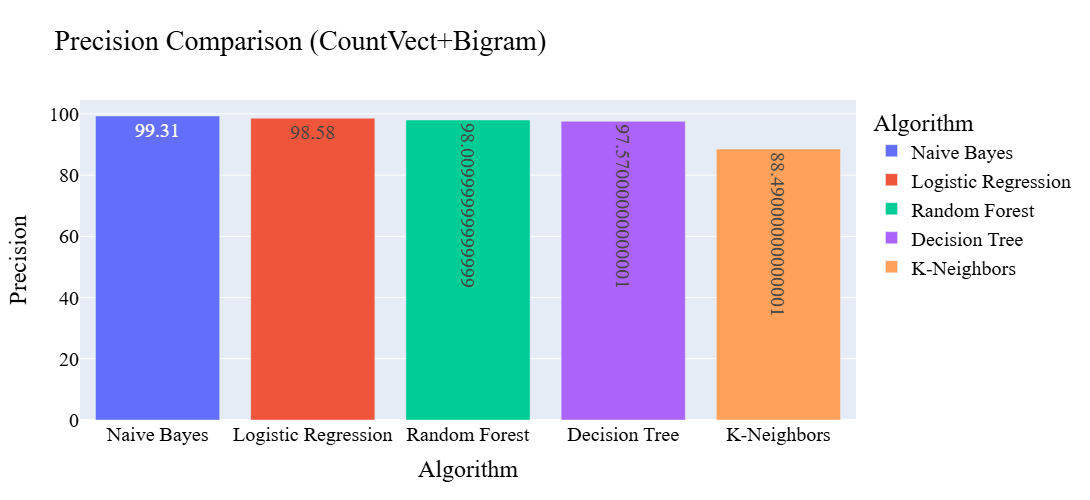

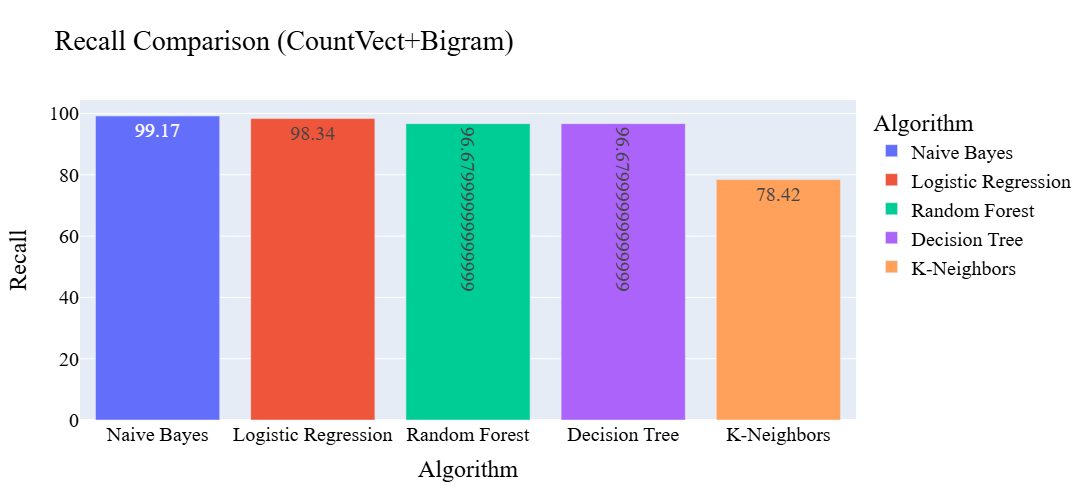

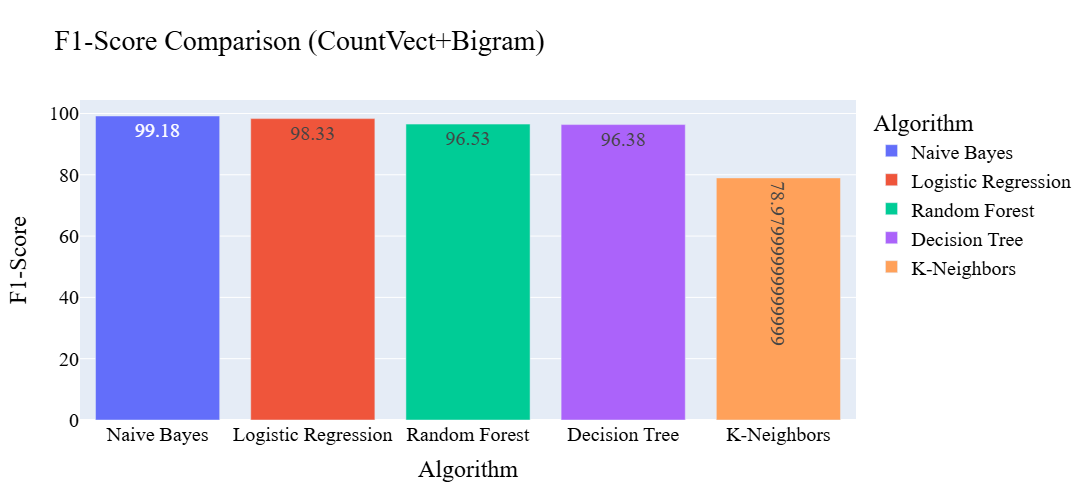

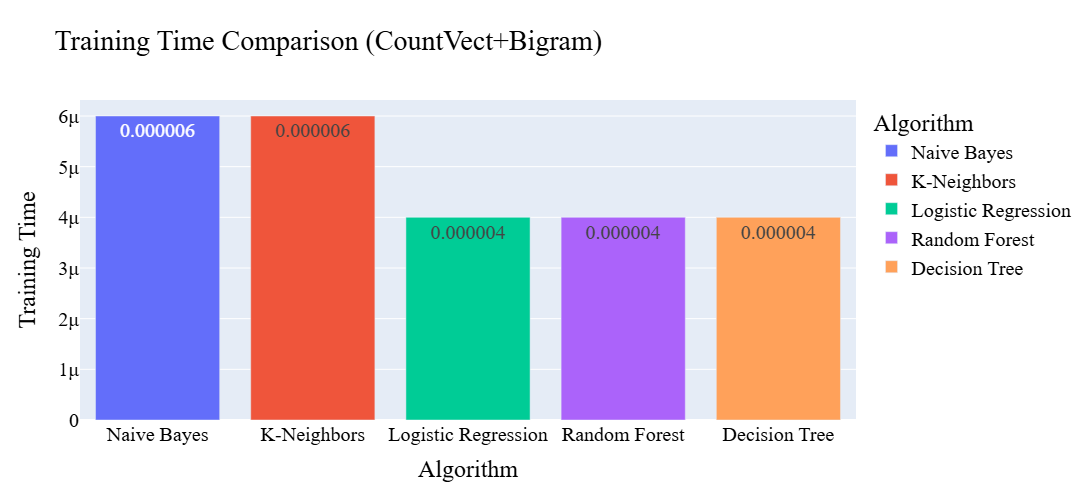

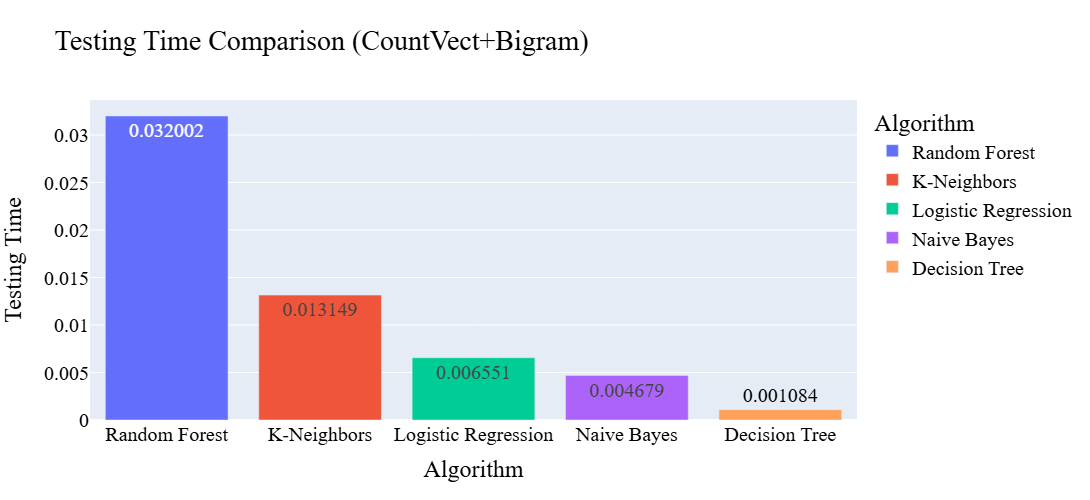

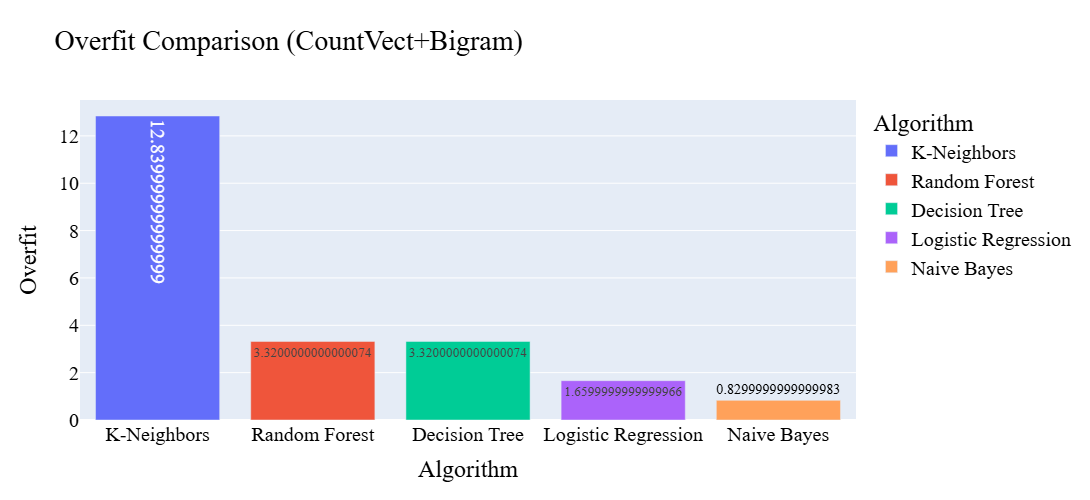

In [25]:
MetResumBG=[[],[],[],[],[],[],[]]
FetExtBG=CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(2,2))
FetExtBGVcTr=FetExtBG.fit_transform(TrResumX) 
FetExtBGVcTs=FetExtBG.transform(TsResumX)

sclob=preprocessing.StandardScaler(with_mean=False)
obj = sclob.fit(FetExtBGVcTr)
FetExtBGVcTr = obj.transform(FetExtBGVcTr)
FetExtBGVcTs = obj.transform(FetExtBGVcTs)

DcV=4
print("________________________________________________________________________")
for i in range(len(ModelsResum)):
    print("                         {}".format(ModelIDResum[i]))
    print("________________________________________________________________________")
    ModelFetExtBG = ModelsResum[i]
    init_time_execution = datetime.datetime.now()
    ModelFetExtBG.fit(FetExtBGVcTr, TrResumY)
    init_time_execution = datetime.datetime.now()
    end_time_execution = datetime.datetime.now()
    time_of_execution = end_time_execution - init_time_execution
    time_of_execution_sec=time_of_execution.total_seconds()
    
    Init_PredTime = datetime.datetime.now()
    PredFetExtBG=ModelFetExtBG.predict(FetExtBGVcTs)
    End_PredTime = datetime.datetime.now()
    PredTimeTotal = End_PredTime - Init_PredTime
    PredTimeTotal_sec=PredTimeTotal.total_seconds()
    PredFetExtBGTr=ModelFetExtBG.predict(FetExtBGVcTr)
    AccFetExtBGTr=round(metrics.accuracy_score(TrResumY,PredFetExtBGTr),DcV)*100
    AccFetExtBGTs=round(metrics.accuracy_score(TsResumY,PredFetExtBG),DcV)*100
    
    MetResumBG[0].append(AccFetExtBGTs)
    MetResumBG[1].append(round(metrics.precision_score(TsResumY,PredFetExtBG,average="weighted"),DcV)*100)      
    MetResumBG[2].append(round(metrics.recall_score(TsResumY,PredFetExtBG,average="weighted"),DcV)*100)
    MetResumBG[3].append(round(metrics.f1_score(TsResumY,PredFetExtBG,average="weighted"),DcV)*100)
    ct=pandas.crosstab(TsResumY, PredFetExtBG, rownames=['True'], colnames=['Predicted'], margins=True)  
    CnfVsFn(ct,ModelIDResum[i],"CountVect+Bigram")
    MetResumBG[4].append(time_of_execution_sec)
    MetResumBG[5].append(PredTimeTotal_sec)
    MetResumBG[6].append(AccFetExtBGTr)

    prbi=round(metrics.precision_score(TsResumY,PredFetExtBG,average="weighted"),DcV)*100
    rcbi=round(metrics.recall_score(TsResumY,PredFetExtBG,average="weighted"),DcV)*100
    f1bi=round(metrics.f1_score(TsResumY,PredFetExtBG,average="weighted"),DcV)*100
    
    print(metrics.classification_report(TsResumY, PredFetExtBG))
    print("\t\tAccuracy => {}%      Precision => {}%\n".format(AccFetExtBGTs,prbi))
    print("\t\tRecall => {}%      F1-Score => {}%\n".format(rcbi,f1bi))
    print("________________________________________________________________________")

DfFetExtBG=pandas.DataFrame({
    "Algorithm":ModelIDResum,
    "Accuracy":MetResumBG[0],
    "Precision":MetResumBG[1],
    "Recall":MetResumBG[2],
    "F1-Score":MetResumBG[3],
    "Training Time":MetResumBG[4],
    "Testing Time":MetResumBG[5],
    "Overfit":numpy.array(MetResumBG[6])-numpy.array(MetResumBG[0])
})
for i in DfFetExtBG.columns[1:]:
    DfFetExtBG=DfFetExtBG.sort_values(by=i,ascending=False)
    fig = express.bar(DfFetExtBG, y=i, x="Algorithm",text=i,color="Algorithm",
                 title="{} Comparison (CountVect+Bigram)".format(i),height=500,width=700)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="Black"
        )
    )
    fig.show()

DfFetExtBG.sort_values(by="Accuracy",ascending=False).to_csv("Bigram_Result.csv")
DfFetExtBG=DfFetExtBG.sort_values(by="Accuracy",ascending=False).reset_index(drop=True)


In [26]:
DfFetExtUG

Algorithm  Accuracy  Precision  Recall  F1-Score  Training Time  \
0          Naive Bayes     99.17      99.31   99.17     99.18       0.012774   
1        Decision Tree     98.76      98.90   98.76     98.74       0.128418   
2  Logistic Regression     98.34      98.55   98.34     98.32       0.375216   
3        Random Forest     97.51      98.01   97.51     97.41       0.564063   
4          K-Neighbors     78.42      88.49   78.42     78.98       0.002445   

   Testing Time  Overfit  
0      0.002670     0.83  
1      0.000978     1.24  
2      0.002310     1.66  
3      0.026762     2.49  
4      0.056512    13.12

In [27]:
DfFetExtBG

Algorithm  Accuracy  Precision  Recall  F1-Score  Training Time  \
0          Naive Bayes     99.17      99.31   99.17     99.18       0.000006   
1  Logistic Regression     98.34      98.58   98.34     98.33       0.000004   
2        Decision Tree     96.68      97.57   96.68     96.38       0.000004   
3        Random Forest     96.68      98.01   96.68     96.53       0.000004   
4          K-Neighbors     78.42      88.49   78.42     78.98       0.000006   

   Testing Time  Overfit  
0      0.004679     0.83  
1      0.006551     1.66  
2      0.001084     3.32  
3      0.032002     3.32  
4      0.013149    12.84

In [28]:
CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(1,1))

CountVectorizer(max_df=0.7, stop_words='english')